# Supermarket Sales Data Analysis: January 2019 - March 2019

## Loading the Environment

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the cleaned dataset

In [5]:
df = pd.read_csv('cleaned_supermarket_sales.csv')

## Setting the style for seaborn

In [7]:
sns.set(style="whitegrid")

## Sales by Branch (Bar Chart)

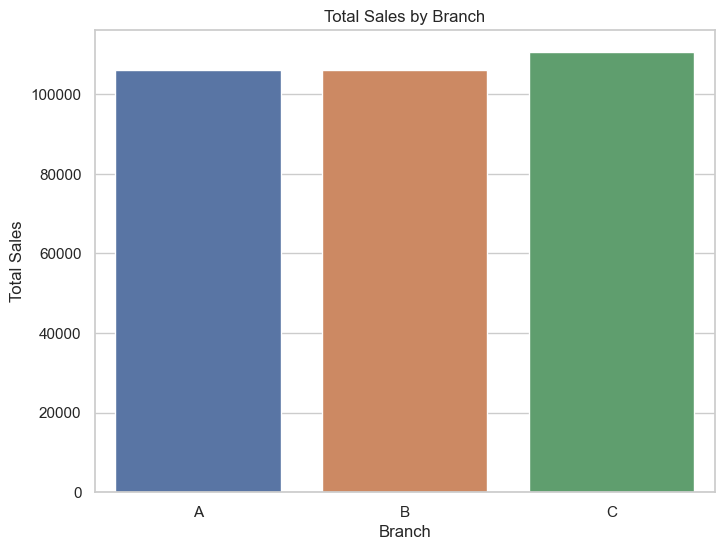

In [9]:
sales_by_branch = df.groupby('branch')['total'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='branch', y='total', data=sales_by_branch, hue='branch', dodge=False)
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.savefig('Total Sales by Branch.png', dpi=300, bbox_inches='tight')
plt.show()

## Sales Trends by Day of the Week (Line Plot)

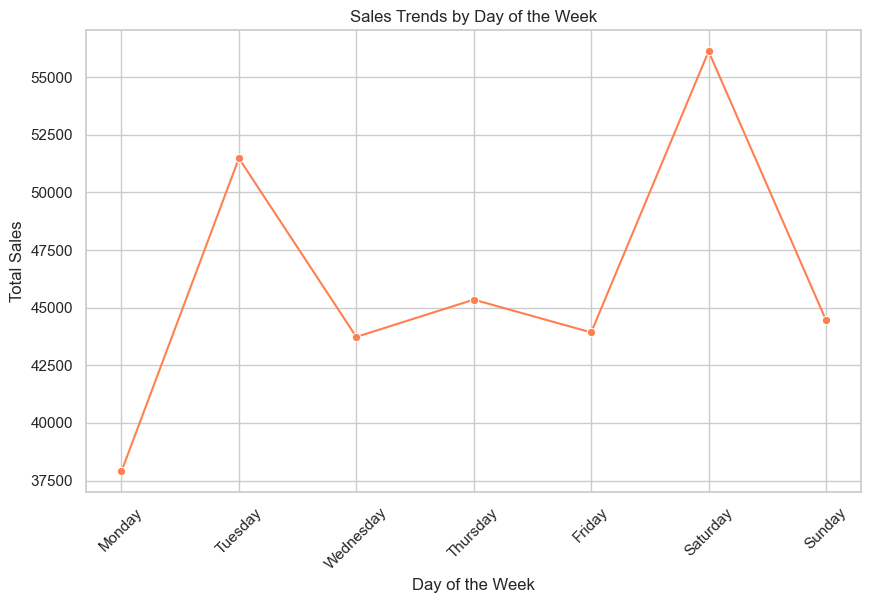

In [11]:
sales_by_day = df.groupby('day')['total'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='total', data=sales_by_day, marker='o', color='coral')
plt.title('Sales Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('Sales Trends by Day of the Week.png', dpi=300, bbox_inches='tight')
plt.show()

## Sales by Time Period

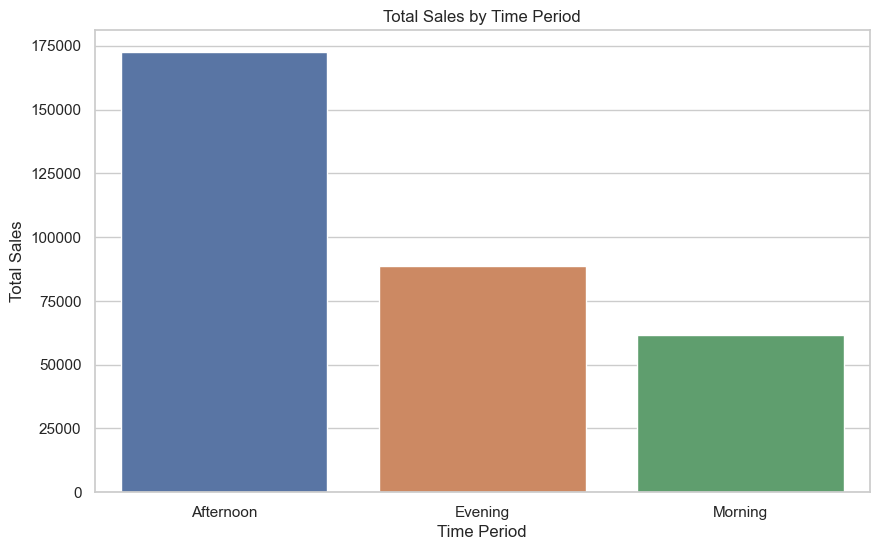

In [13]:
sales_by_time_period = df.groupby('time_period')['total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='time_period', y='total', data=sales_by_time_period, hue='time_period', dodge=False)
plt.title('Total Sales by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Total Sales')
plt.savefig('Total Sales by Time Period.png', dpi=300, bbox_inches='tight')
plt.show()

## Distribution of Customer Rating

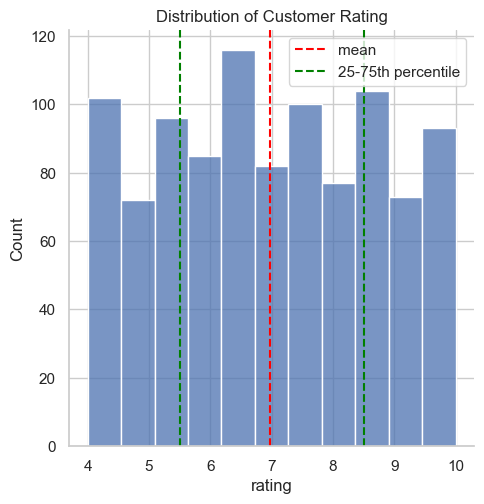

In [15]:
sns.displot(df['rating'])
plt.axvline(x=np.mean(df['rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['rating'],25),c='green',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(df['rating'],75),c='green',ls='--')
plt.legend()
plt.title('Distribution of Customer Rating')
plt.savefig('Distribution of Customer Rating.png', dpi=300, bbox_inches='tight')
plt.show()

## Choice of Payment Method

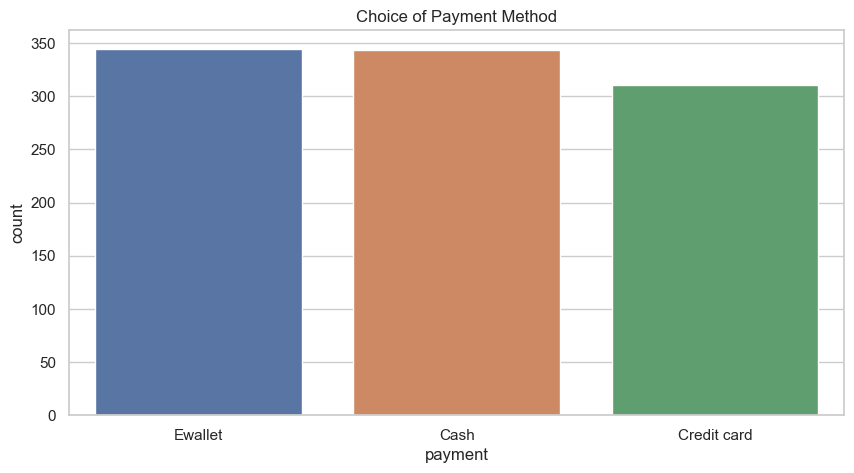

In [17]:
plt.figure(figsize=(10, 5)) #setting image size
sns.countplot(data=df,x='payment',hue='payment',dodge=False)
plt.title('Choice of Payment Method')
plt.savefig('Choice of Payment Method.png', dpi=300, bbox_inches='tight')
plt.show()

## Percentage of Total Sales by Product Line

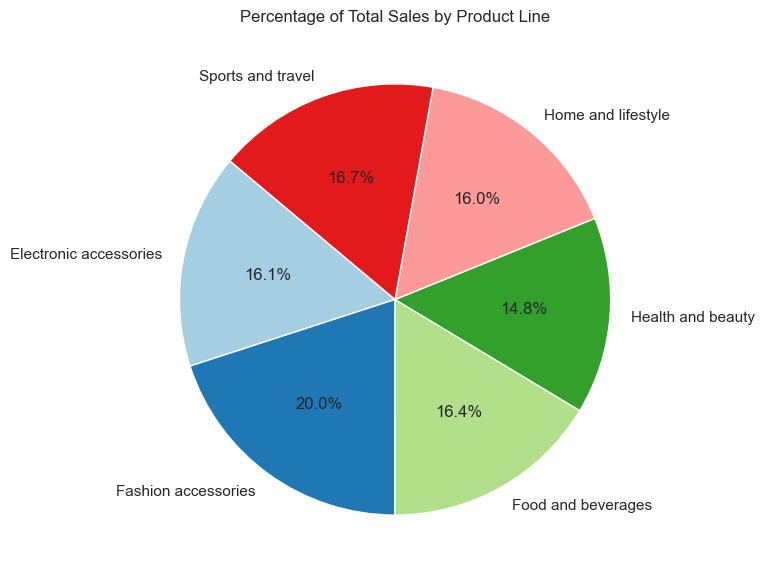

In [19]:
product_sales = df.groupby('product_line')['total'].sum().reset_index()

total_sales_sum = product_sales['total'].sum()
product_sales['percentage'] = (product_sales['total'] / total_sales_sum) * 100


plt.figure(figsize=(10, 7))
plt.pie(product_sales['percentage'], labels=product_sales['product_line'], autopct='%1.1f%%', 
        colors=plt.cm.Paired(range(len(product_sales))), startangle=140)
plt.title('Percentage of Total Sales by Product Line')
plt.savefig('Percentage of Total Sales by Product Line.png', dpi=300, bbox_inches='tight')
plt.show()